In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval


In [2]:
pd.options.display.max_columns = None

In [3]:
# фиксируем RANDOM_SEED, чтобы эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [4]:
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.6 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Импорт данных 

In [6]:
'''#подгружаем файлы с тренировочными и тестовыми данными в разные датафреймы
hotels_train = pd.read_csv('data/hotels_train.csv')
hotels_test = pd.read_csv('data/hotels_test.csv')
sample_submission=pd.read_csv('data/hotels_submission.csv')'''

"#подгружаем файлы с тренировочными и тестовыми данными в разные датафреймы\nhotels_train = pd.read_csv('data/hotels_train.csv')\nhotels_test = pd.read_csv('data/hotels_test.csv')\nsample_submission=pd.read_csv('data/hotels_submission.csv')"

In [7]:
'''#подгружаем файлы с тренировочными и тестовыми данными в разные датафреймы
hotels_train = pd.read_csv('../input/sf-booking/hotels_train.csv')
hotels_test = pd.read_csv('../input/sf-booking/hotels_test.csv')
sample_submission=pd.read_csv('../input/sf-booking/submission.csv')'''

"#подгружаем файлы с тренировочными и тестовыми данными в разные датафреймы\nhotels_train = pd.read_csv('../input/sf-booking/hotels_train.csv')\nhotels_test = pd.read_csv('../input/sf-booking/hotels_test.csv')\nsample_submission=pd.read_csv('../input/sf-booking/submission.csv')"

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#подгружаем файлы с тренировочными и тестовыми данными в разные датафреймы
hotels_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/hotels_train.csv')
hotels_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/hotels_test.csv')
sample_submission=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/hotels_submission.csv')

Изучаем структуру датафреймов

In [10]:
hotels_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [11]:
hotels_train.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [12]:
hotels_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [13]:
hotels_test.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,15,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,41.393192,2.161520


В тестовых данных отсутствует целевая переменная reviewer_score. Создадим этот признак и заполним значением 0.

In [14]:
hotels_test['reviewer_score']=0

Объединяем датафреймы для последующей обработки.
Но прежде добавим в них столбцы  них столбцы sample с пометкой о тренировочных и тестовых данных, чтобы в дальнейшнем можно было разделить данные по этому признаку.

In [15]:
hotels_train['sample']='train'
hotels_test['sample']='test'

#объединение наборов данных в один датафрейм
hotels = hotels_test.append(hotels_train, sort=False).reset_index(drop=True)

Проверяем получившийся датафрейм

In [16]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

Количество строк равно сумме строк двух наборов данных, столбцов - 18. Индексы строк остались исходными.

### Проектирование признаков

#### Извлечение количества ночей из тегов

В тегах часто встречается информация о количестве ночей, например "Stayed 1 night", "Stayed 2 nights". Извлечем эту информацию в отдельный признак, а на 
этапе проверки пропущенных значений посмотрим, насколько будет заполнен этот признак.

In [17]:
def tag_extract(cell):
    list_words=cell.split()
    if 'Stayed' in list_words:
        num_nights=list_words[list_words.index('Stayed')+1] #из списка слов в строке извлекаем слово, следующее за "Stayed"
        return num_nights
hotels['nights_stayed']=hotels['tags'].apply(tag_extract)

In [18]:
hotels['nights_stayed'].describe()

count     515546
unique        31
top            1
freq      193645
Name: nights_stayed, dtype: object

#### Преобразование адреса отеля

Рассмотрим структуру строки из признака hotel_address


In [19]:
for i in range(5):
    print(hotels['hotel_address'].iloc[i])

Via Senigallia 6 20161 Milan Italy
Arlandaweg 10 Westpoort 1043 EW Amsterdam Netherlands
Mallorca 251 Eixample 08008 Barcelona Spain
Piazza Della Repubblica 17 Central Station 20124 Milan Italy
Singel 303 309 Amsterdam City Center 1012 WJ Amsterdam Netherlands


Из признака адреса отеля (hotel_address) можно выделить в отдельные признаки страну расположения отеля (country),города (town) и индекса (postal_code). Название страны в адресах указано в конце текстовой строки, то есть это последний или два последних слова в адресе отеля. Для выделения названия страны из адреса подгрузим дополнительно справочник с названиями всех стран (скачан из интернета). Затем напишем функцию, в которой будет реализован цикл поиска страны в адресе по справочнику стран.

In [20]:
#countries=pd.read_excel('../input/countries-excel/all_countries.xlsx')['english'] #справочник стран мира

In [21]:
countries=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/all_countries.xlsx')['english'] #справочник стран мира

In [22]:
#функция определения страны из адреса отеля
def find_country(address):
    for country in list(countries): #проходим циклом по всем адресам из датасета и справочнику стран
        if country in ' '.join(address.split()[-2:]):  #ищем название страны из сравочника в 2 последних словах из адреса
            return country
        
#создаем новый признак страны отеля, применив к признаку адреса функцию 
hotels['country']=hotels['hotel_address'].apply(find_country) 

In [23]:
hotels['country'].value_counts()
# в датасете представлены отели из 6 стран

United Kingdom    262301
Spain              60149
France             59928
Netherlands        57214
Austria            38939
Italy              37207
Name: country, dtype: int64

In [24]:
#функция определения города из адреса отеля
def short_address(address,country):
    words=address.replace(' '+country,'').split() #удаляем из адреса страну, из оставшейся строки создаем список
    short_address=[] #пустой список
    for word in words:
        if len({'0','1','2','3','4','5','6','7','8','9'}.intersection(set(word)))==0:
            short_address.append(word)  #если в слове не содержится цифра, кладем его в будущий "короткий адрес" (таким образом исключаем из адреса номера домов и почтовые индексы)
    town=short_address[-1] #город - это последний элемент в получившемся списке
    return town

In [25]:
#создаем новый признак города, применив к признаку адреса функцию 
hotels['town']=hotels.apply(lambda x: short_address(x['hotel_address'], x['country']),axis=1)

#проверяем получившийся список городов
hotels['town'].value_counts()

London       262301
Barcelona     60149
Paris         59928
Amsterdam     57214
Vienna        38939
Milan         37207
Name: town, dtype: int64

Выделим из адреса индекс месторасположения отеля. Подстрока индекс в строке hotel_address для разных стран(городов) может находиться разных местах:
- для Лондона: округ/улица/дом - город - индекс - страна
- для Амстердама: округ/улица/дом -  - индекс - "AG" - город - страна
- для других городов: округ/улица/дом - индекс - город - страна. <br>
Будем учитывать эту особенность при поиске индекса в строке адреса.

In [26]:
#функция определения индекса
def postal_code(address, town, country):
    words=address.replace(' '+country,'').replace(' '+town,'').split() #удаляем из адреса страну и город, из оставшейся строки создаем список
    if town=='London':
        postal_code=' '.join(words[-2:])
    elif town=='Amsterdam':
        postal_code=words[-2]
    else:
        postal_code=words[-1]
    return postal_code

#создаем признак города
hotels['postal_code']=hotels.apply(lambda x: postal_code(x['hotel_address'],x['town'],x['country']),axis=1)

In [27]:
#сравним исходный признак адреса с получившимися признаками страны, города и индекса отеля. 
#убедимся, что признаки спроектированы верно
hotels[['hotel_address','country','town','postal_code']].head(3)

,hotel_address,country,town,postal_code
0,Via Senigallia 6 20161 Milan Italy,Italy,Milan,20161
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,Netherlands,Amsterdam,1043
2,Mallorca 251 Eixample 08008 Barcelona Spain,Spain,Barcelona,08008


Удаляем исходный признак адреса

In [28]:
hotels=hotels.drop('hotel_address',axis=1)

#### Преобразование даты написания отзыва

In [29]:
#извлекаем год написания отзыва из даты в отдельный признак
hotels['review_year']=pd.to_datetime(hotels['review_date']).dt.year

#удаляем исходный признак даты отзыва
hotels=hotels.drop('review_date',axis=1)

In [30]:
#извлекаем числовую часть из признака из days_since_review и преобразуем в числовой формат
def days(days_since_review):
    days=days_since_review.split()
    return int(days[0])
hotels['days_since_review']=hotels['days_since_review'].apply(days)

#### Преобразование текста отзыва

Обработаем признаки negative_review, positive_review на предмет тональности текста с помощью библиотеки SentimentIntensityAnalyzer.
Метод polarity_scores возвращает значения показателей neg,neu,pos,compound. Будем использовать показатель compound, принимающий значение от -1 (максимально негативная тональность текста) до 1 (максимально позитивная тональность). Создадим новые признаки со значениями compound

In [31]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
nltk.downloader.download('vader_lexicon')

sent_analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [33]:
#создаем новые признаки
hotels['negative_review_compound']=hotels['negative_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])
hotels['positive_review_compound']=hotels['positive_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])

#выводим получившиеся значения для проверки
hotels[['negative_review_compound','positive_review_compound']].head()

,negative_review_compound,positive_review_compound
0,-0.0554,0.9615
1,-0.2960,0.3400
2,0.0000,0.6908
3,-0.7096,0.9153
4,-0.7096,0.7717


In [34]:
#удалим исходные признаки текста отзывов
hotels=hotels.drop(['negative_review','positive_review'],axis=1)

### Работа с пропущенными значениями

In [35]:
#Выводим столбцы с пропусками
df_null_percent=hotels.isnull().mean()*100
df_null_percent[df_null_percent>0].sort_values(ascending=False)


lat              0.633655
lng              0.633655
nights_stayed    0.037228
dtype: float64

Пропуски имеются в столбцах широты, долготы и спроектированного признака количества ночей

#### Заполнение координат отеля

Для нахождения недостающих координат отеля воспользуемся библиотекой geocode. Это библиотека Python для запроса GPS-координат, названия региона и названия муниципалитета из почтовых индексов. 

In [36]:
!pip install pgeocode
import pgeocode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
#создаем словарь с названиями стран из нашего датасета и соответствующими им кодами стран в библиотеке pgeocode
coutry_codes={'United Kingdom': 'GB',
              'Spain': 'ES',
              'France': 'FR',
              'Netherlands':'NL',
              'Austria': 'AT',
              'Italy': 'IT'}

#функции нахождения координат по стране и индексу муниципалитета
def find_lat(latitude,country,code): #широта
    if pd.isnull(latitude):
        nomi = pgeocode.Nominatim(coutry_codes[country])
        latitude=nomi.query_postal_code(code)['latitude']
    return latitude

def find_long(longitude,country,code):  #долгота
    if pd.isnull(longitude):
        nomi = pgeocode.Nominatim(coutry_codes[country])
        longitude=nomi.query_postal_code(code)['longitude']
    return longitude

In [38]:
#заполняем пропуски в координатах отелей, применив функции
hotels['lat']=hotels.apply(lambda x:find_lat(x['lat'],x['country'],x['postal_code']),axis=1 )
hotels['lng']=hotels.apply(lambda x:find_long(x['lng'],x['country'],x['postal_code']),axis=1 )

#### Количество ночей

Пропуски в столбце с количеством ночей заполним модальными значениями для данного отеля.

In [39]:
#создаем сводную таблицу с названиями отелей и модальным значением количества ночей, на которое останавливаются в них гости
mode_nights=hotels[['hotel_name','nights_stayed']].groupby('hotel_name').agg(lambda x: pd.Series.mode(x)[0])
mode_nights.value_counts()

nights_stayed
1                690
2                436
3                352
4                 12
5                  1
7                  1
dtype: int64

In [40]:
def fillna_nights(nights,hotel):
    if pd.isnull(nights):
        nights=mode_nights.loc[hotel]['nights_stayed']
    return nights
hotels['nights_stayed']=hotels.apply(lambda x: fillna_nights(x['nights_stayed'], x['hotel_name']),axis=1)

In [41]:
hotels['nights_stayed'] = hotels['nights_stayed'].astype('int')

In [42]:
#проверяем повторно пропуски
df_null_percent=hotels.isnull().mean()*100
df_null_percent[df_null_percent>0].sort_values(ascending=False)

Series([], dtype: float64)

### Проектирование признаков
#### Расстояние от центра города

Имея данные по координатам каждого отеля, спроектируем новый признак -  расстояние до отеля от центра города. Расстояние можно определить с помощью  библиотеки geopy по координатам двух точек.
Создадим датафрейм с координатами центра городов, которые взяты из Яндекс.Карт

In [43]:
#датафрейм с координатами центра городов
center_coord=pd.DataFrame(
data = [
['London', (51.507351, -0.127696)],
['Barcelona',(41.392696, 2.144449)],
['Paris', (48.856663, 2.351556)],
['Amsterdam', (52.373057, 4.892557)],
['Vienna', (48.206487, 16.363460)],
['Milan', (45.464183, 9.189595)]],
columns = ['name', 'coordinates']
)
center_coord

,name,coordinates
0,London,"(51.507351, -0.127696)"
1,Barcelona,"(41.392696, 2.144449)"
2,Paris,"(48.856663, 2.351556)"
3,Amsterdam,"(52.373057, 4.892557)"
4,Vienna,"(48.206487, 16.36346)"
5,Milan,"(45.464183, 9.189595)"


In [44]:
#загружаем бибилотеку и модули
!pip install geopy
import geopy.distance
from geopy.distance import geodesic as GD

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
#функция нахождения расстояния от центра
def distance(lat,lng,town,center_coord):
    center=center_coord[center_coord['name']==town]['coordinates']
    hotel=(lat,lng)
    return GD(center,hotel).km
#создаем признак расстояния от центра
hotels['distance']=hotels.apply(lambda x: distance(x['lat'],x['lng'],x['town'],center_coord),axis=1)

In [46]:
hotels[['distance']].describe()

,distance
count,515738.000000
mean,3.243238
std,2.529138
min,0.072935
25%,1.513387
50%,2.595905
75%,4.095056
max,17.197663


### Преобразование признаков

Нормализуем все числовые признаки по следующей схеме:
1. Выделим списки числовых признаков num_cols (кроме целевой переменной reviewer_score) и строковых object_cols + целевой переменной reviewer_score
2. Нормализуем датасет, состоящий только из числовых признаков, методом RobustScaler
3. Присоединим к нормализованному датасету hotels_scaled столбцы со строковыми данными датасета hotels

In [47]:
num_cols = [s for s in hotels.columns if hotels[s].dtypes != 'object']
object_cols = [s for s in hotels.columns if hotels[s].dtypes == 'object']

In [48]:
num_cols.remove('reviewer_score')
object_cols.append('reviewer_score')

In [49]:
#нормализация
from sklearn import preprocessing
r_scaler=preprocessing.RobustScaler()
hotels_scaled=r_scaler.fit_transform(hotels[num_cols])
hotels_scaled=pd.DataFrame(hotels_scaled,columns=num_cols,index=list(hotels.index)) #сохраняем исходные индексы строк

#объединение строковых признаков с нормализованными числовыми признаками
hotels_normalized=pd.concat([hotels_scaled,hotels[object_cols]], axis=1)

### Кодирование признаков

In [50]:
#Датасет с кодированными признаками в дальнейшем будет называться hotels_encoded
hotels_encoded=hotels_normalized.copy()

#### 1.Теги

In [51]:
hotels_encoded['tags'].head()

0    [' Leisure trip ', ' Couple ', ' Double Room '...
1    [' Leisure trip ', ' Group ', ' Triple Room ',...
2    [' Business trip ', ' Solo traveler ', ' Twin ...
3    [' Leisure trip ', ' Couple ', ' Ambassador Ju...
4    [' Business trip ', ' Solo traveler ', ' Class...
Name: tags, dtype: object

Теги в каждом отзыве содержатся в виде списка тегов (при этом тип данных - object). Для анализа и кодирования этого признака необходимо "разрушить" ячейки таким образом, чтобы в одной ячейке был один тег. Для этого создадим новый датасет tags_exploded, в котором будут все теги из исходного датасета, при этом количество строк существенно увеличится

In [52]:
hotels_encoded['tag'] = hotels_encoded['tags'].apply(literal_eval) #преобразование строки в список
tags_exploded=hotels_encoded[['tag']].explode('tag')  #назначаем новые индексы строк для избежания дублирования индексов (прежние индексы сохранятся в новый столбец index) 
tags_exploded.head(10)

,index,tag
0,0,Leisure trip
0,0,Couple
0,0,Double Room
0,0,Stayed 2 nights
1,1,Leisure trip
1,1,Group
1,1,Triple Room
1,1,Stayed 1 night
2,2,Business trip
2,2,Solo traveler


In [53]:
tags_exploded.tail(10)

,index,tag
515735,515735,Single Room
515735,515735,Stayed 1 night
515736,515736,Leisure trip
515736,515736,Solo traveler
515736,515736,Deluxe Double Room
515736,515736,Stayed 2 nights
515737,515737,Leisure trip
515737,515737,Couple
515737,515737,Bunk Bed Room
515737,515737,Stayed 4 nights


Таким образом, теги вынесены в отдельную таблицу, дублирующиеся индексы означают принадлежность тегов к одному и тому же отзыву, а в столбце index сохранены индексы исходного датасета (они пригодятся для объединения таблиц после преобразования)

Определим 10 наиболее часто встречающихся отзывов, исключив из списка тегов те, в которых содержится количество ночей, так как эта информация была вынесена в отдельный признак nights_stayed

In [54]:
#часто встречающиеся теги
popular_tags=tags_exploded[tags_exploded['tag'].str.contains('Stayed')==False]['tag'].value_counts(normalize=True,sort=True,ascending=False).head(10)
popular_tags

 Leisure trip                       0.226924
 Submitted from a mobile device     0.167101
 Couple                             0.137038
 Solo traveler                      0.058958
 Business trip                      0.045050
 Group                              0.035519
 Family with young children         0.033141
 Double Room                        0.019123
 Standard Double Room               0.017516
 Superior Double Room               0.017052
Name: tag, dtype: float64

In [55]:
#оставим в признаке  tag 10 наиболее часто встречающихся тегов, остальные заменим на other
tags_exploded['tag']=tags_exploded['tag'].apply(lambda x: x if x in list(popular_tags.index) else 'Other')

#выполним кодирование тегов методом OneHot Encoding
encoder=ce.OneHotEncoder(cols=['tag'])
type_bin=encoder.fit_transform(tags_exploded['tag'])
tags_exploded=pd.concat([tags_exploded,type_bin],axis=1)
tags_exploded.head(20)

,index,tag,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,tag_10,tag_11
0,0,Leisure trip,1,0,0,0,0,0,0,0,0,0,0
0,0,Couple,0,1,0,0,0,0,0,0,0,0,0
0,0,Double Room,0,0,1,0,0,0,0,0,0,0,0
0,0,Other,0,0,0,1,0,0,0,0,0,0,0
1,1,Leisure trip,1,0,0,0,0,0,0,0,0,0,0
1,1,Group,0,0,0,0,1,0,0,0,0,0,0
1,1,Other,0,0,0,1,0,0,0,0,0,0,0
1,1,Other,0,0,0,1,0,0,0,0,0,0,0
2,2,Business trip,0,0,0,0,0,1,0,0,0,0,0
2,2,Solo traveler,0,0,0,0,0,0,1,0,0,0,0


In [56]:
#сгруппируем таблицу с кодами тегов по индексам, чтобы привести количество строк в соответствие с исходной таблицей. При группировке коды тегов агрегируются методом max.

tags_collapsed=tags_exploded.drop(['tag'],axis=1).groupby(tags_exploded.index).max()
  #возвращаем исходные индексы
tags_collapsed.head(5)

,index,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,tag_10,tag_11
index,,,,,,,,,,,,
0,0,1,1,1,1,0,0,0,0,0,0,0
1,1,1,0,0,1,1,0,0,0,0,0,0
2,2,0,0,0,1,0,1,1,1,0,0,0
3,3,1,1,0,1,0,0,0,0,0,0,0
4,4,0,0,0,1,0,1,1,1,0,0,0


Теперь индексы кодированного датасета тегов и исходного датасета совпадают, и можно их объединить, удалив вспомогательный столбец index, а также признаки tags и tag

In [57]:
hotels_encoded=pd.concat([hotels_encoded,tags_collapsed], axis=1)
hotels_encoded=hotels_encoded.drop(['tags','tag'],axis=1)

In [58]:
hotels_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 515737
Data columns (total 32 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  float64
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  float64
 3   total_number_of_reviews                     515738 non-null  float64
 4   review_total_positive_word_counts           515738 non-null  float64
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  float64
 6   days_since_review                           515738 non-null  float64
 7   lat                                         515738 non-null  float64
 8   lng                                         515738 non-null  float64
 9   nights_stayed                               515738 non-null  float64
 

#### 2. Национальность автора отзыва

In [59]:
#посмотрим распределение национальностей авторов отзывов
print(hotels_encoded['reviewer_nationality'].value_counts(normalize=True,sort=True,ascending=False)*100)

 United Kingdom               47.552439
 United States of America      6.871124
 Australia                     4.204848
 Ireland                       2.874909
 United Arab Emirates          1.984535
                                ...    
 Comoros                       0.000194
 Anguilla                      0.000194
 Tuvalu                        0.000194
 Cape Verde                    0.000194
 Palau                         0.000194
Name: reviewer_nationality, Length: 227, dtype: float64


In [60]:
#оставим в таблице 10 наиболее чаще встречающихся национальностей авторов, остальные заменим на other
popular_nationalities=hotels_encoded['reviewer_nationality'].value_counts(normalize=True,sort=True,ascending=False).head(10)
hotels_encoded['reviewer_nationality']=hotels_encoded['reviewer_nationality'].apply(lambda x: x if x in list(popular_nationalities.index) else 'Other')

# кодирование признака методом OneHot Encoding
encoder=ce.OneHotEncoder(cols=['reviewer_nationality'])
type_bin=encoder.fit_transform(hotels_encoded['reviewer_nationality'])
hotels_encoded=pd.concat([hotels_encoded,type_bin],axis=1)
hotels_encoded.head(5)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,lat,lng,nights_stayed,review_year,negative_review_compound,positive_review_compound,distance,hotel_name,reviewer_nationality,sample,country,town,postal_code,reviewer_score,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,tag_10,tag_11,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7,reviewer_nationality_8,reviewer_nationality_9,reviewer_nationality_10,reviewer_nationality_11
0,1.146640,-0.428571,2.047619,5.928222,3.000000,-0.285714,-0.965909,-1.807244,1.835922,0.0,1.0,0.172632,0.474099,2.015319,Hotel Da Vinci,United Kingdom,test,Italy,Milan,20161,0.0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.551935,0.285714,0.047619,1.176183,-0.647059,0.571429,-0.338068,0.268252,0.965899,-0.5,0.0,-0.166432,-0.692380,0.620596,Urban Lodge Hotel,Other,test,Netherlands,Amsterdam,1043,0.0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,-0.600815,-0.142857,-0.285714,-0.727162,-0.352941,1.714286,0.747159,-3.061155,0.429656,-0.5,-1.0,0.250705,-0.033971,-0.452085,Alexandra Barcelona A DoubleTree by Hilton,Other,test,Spain,Barcelona,08008,0.0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,-0.203666,1.000000,-0.428571,-0.241028,0.941176,0.857143,0.860795,-1.823372,1.840977,-0.5,-1.0,-0.749295,0.387387,-0.299585,Hotel Principe Di Savoia,United States of America,test,Italy,Milan,20124,0.0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1.004073,1.000000,-0.428571,1.041191,-0.235294,-0.142857,0.258523,0.263677,0.976773,0.0,0.0,-0.749295,0.117868,-0.855906,Hotel Esther a,United Kingdom,test,Netherlands,Amsterdam,1012,0.0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [61]:
#удаляем исходный признак
hotels_encoded=hotels_encoded.drop('reviewer_nationality',axis=1)

#### 3. Адрес

In [62]:
# кодирование признака страны
hotels_encoded['country'].nunique()

encoder=ce.OneHotEncoder(cols=['country'])
type_bin=encoder.fit_transform(hotels_encoded['country'])
hotels_encoded=pd.concat([hotels_encoded.drop('country',axis=1),type_bin],axis=1)

### ОТБОР ПРИЗНАКОВ

Необходимо провести анализ мультиколлинеарности, чтобы выбрать уникальные признаки для модели.

In [63]:
#сразу удаляем признак города, так как он будет коррелировать со страной (в датасете представлено по одному городу в каждой стране)
hotels_encoded=hotels_encoded.drop(['town'],axis=1)

Преобразованный датасет с удаленными неинформативными признаками в дальнейшем будет называться hotels_selected

In [64]:
hotels_selected=hotels_encoded.copy()

Построим матрицу корреляции по методу Кендалла. Выбран данный метод, так как в талице имеются категориальные признаки, а также непрерывные признаки, не очищенные от выбросов. 

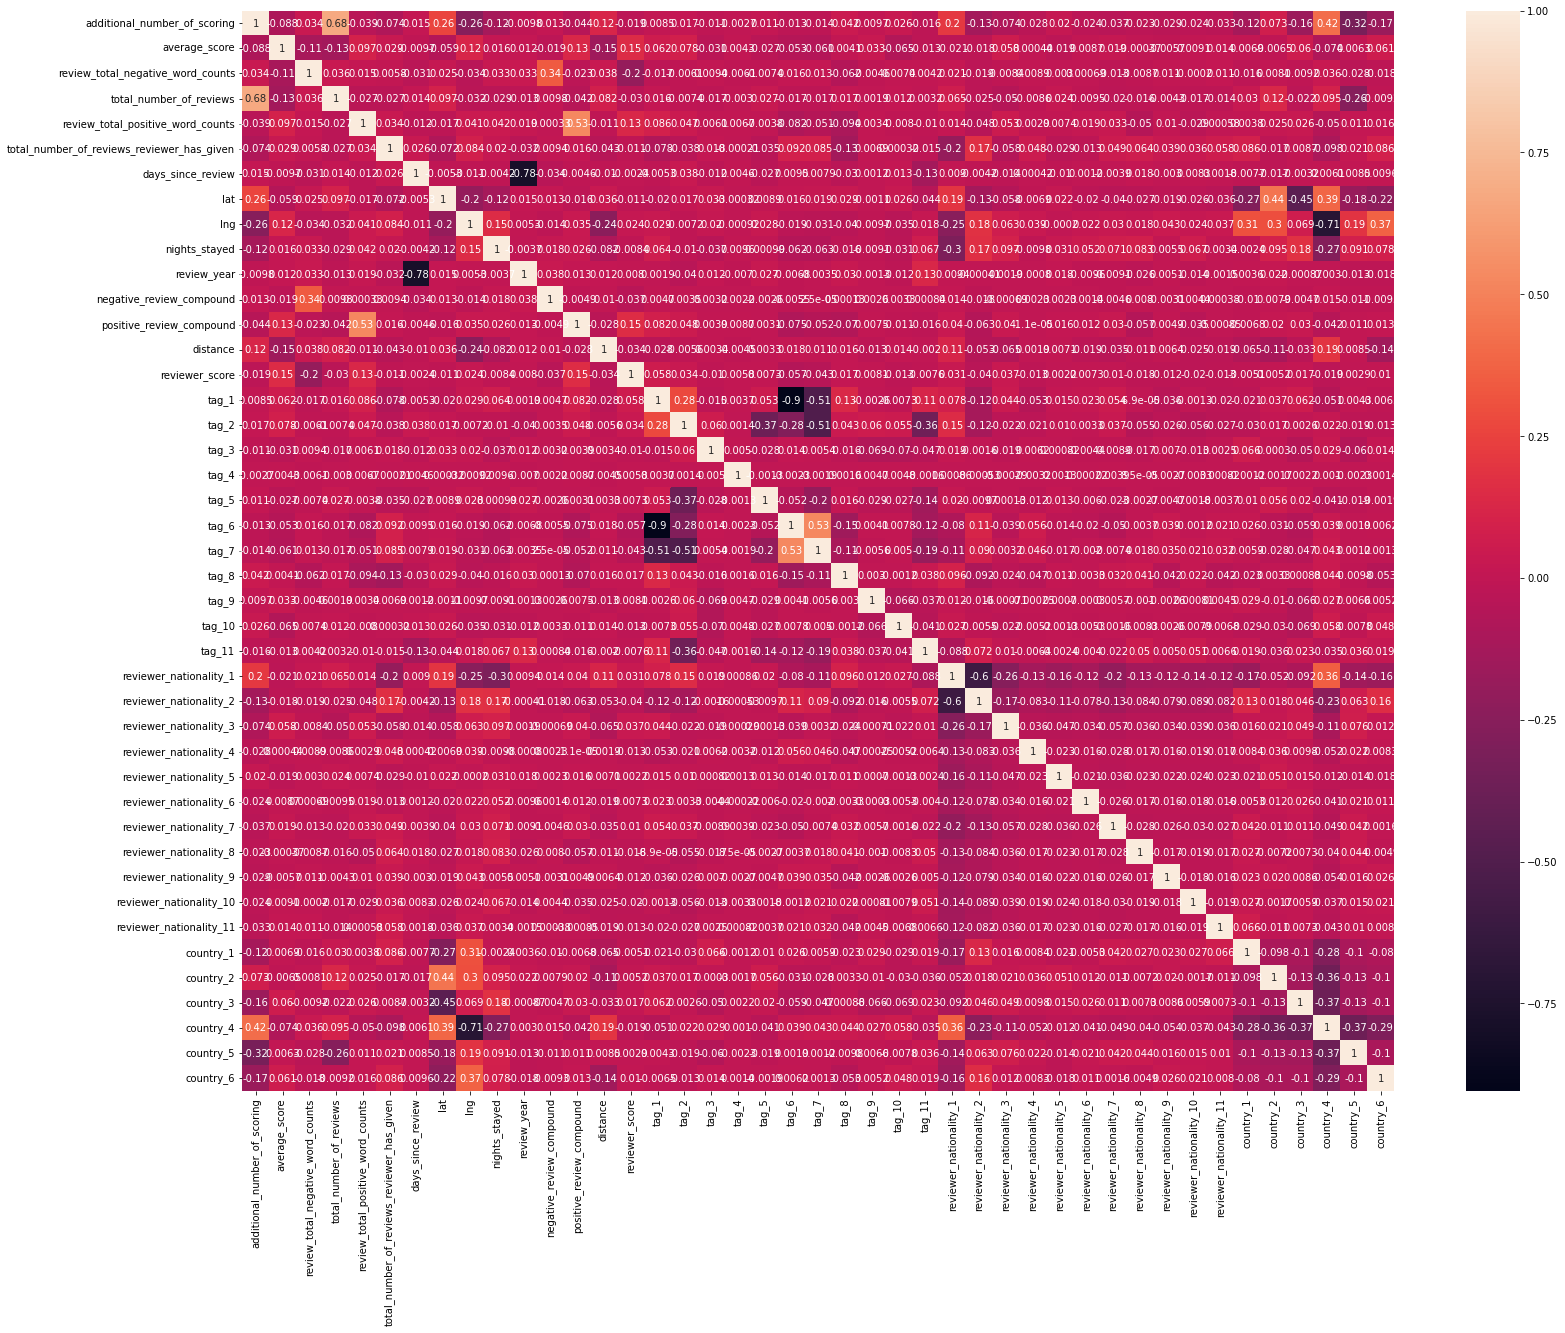

In [65]:
fig=plt.figure(figsize=(20,15))
axes=fig.add_axes([0,0,1,1])
sns.heatmap(hotels_selected.corr(method='kendall'),ax=axes, annot=True);

Наблюдается мультиколлинеарность по парам признаков:
- days_since_review, review_year
- tag_1/tag_5
- lng, country_1 <br>
Решение о том, какие признаки из этих пар будут удалены, будет принято после оценки значимости признаков

### Разделение набора данных перед построением модели

In [66]:
#удаляем строковые признаки, которые не будут использоваться в дальнейшем в модели
hotels_selected.drop(['hotel_name','postal_code'], axis = 1, inplace=True)
hotels_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 515737
Data columns (total 44 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  float64
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  float64
 3   total_number_of_reviews                     515738 non-null  float64
 4   review_total_positive_word_counts           515738 non-null  float64
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  float64
 6   days_since_review                           515738 non-null  float64
 7   lat                                         515738 non-null  float64
 8   lng                                         515738 non-null  float64
 9   nights_stayed                               515738 non-null  float64
 

In [67]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  

# выделим тренировочную и тестовую части 
train_data = hotels_selected[hotels_selected['sample'] == 'train'].drop(['sample'], axis=1)
test_data = hotels_selected[hotels_selected['sample'] == 'test'].drop(['sample'], axis=1)

# Х - данные с информацией об отелях (исключаем признак названия отеля и местоположения отеля, у - целевая переменная (рейтинги отелей) 
y = train_data.reviewer_score.values    # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)


### Оценка значимости признаков 

Для оценки значимости категориальных признаков будем использовать тест хи-квадрат, для непрерывных признаков — тест ANOVA.

In [68]:
# категориальные признаки
cat_cols = ['tag_1',
 'tag_2',
 'tag_3',
 'tag_4',
 'tag_5',
 'tag_6',
 'tag_7',
 'tag_8',
 'tag_9',
 'tag_10',
 'tag_11',
 'reviewer_nationality_1',
 'reviewer_nationality_2',
 'reviewer_nationality_3',
 'reviewer_nationality_4',
 'reviewer_nationality_5',
 'reviewer_nationality_6',
 'reviewer_nationality_7',
 'reviewer_nationality_8',
 'reviewer_nationality_9',
 'reviewer_nationality_10',
 'reviewer_nationality_11',
 'country_1',
 'country_2',
 'country_3',
 'country_4',
 'country_5',
 'country_6']

 # непрерывные признаки
num_cols = ['additional_number_of_scoring',
 'average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'days_since_review',
 'lat',
 'lng',
 'nights_stayed',
 'review_year',
 'negative_review_compound',
 'positive_review_compound',
 'distance']

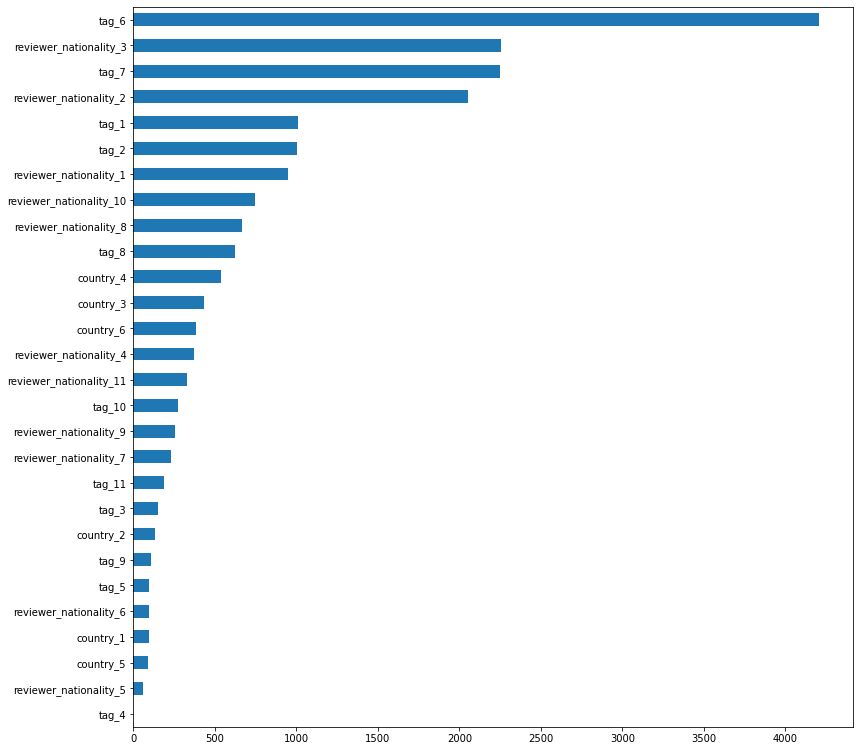

In [69]:
#график значимости категориальных признаков
y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат
fig=plt.figure(figsize=(10,10))
axes=fig.add_axes([0,0,1,1])
imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

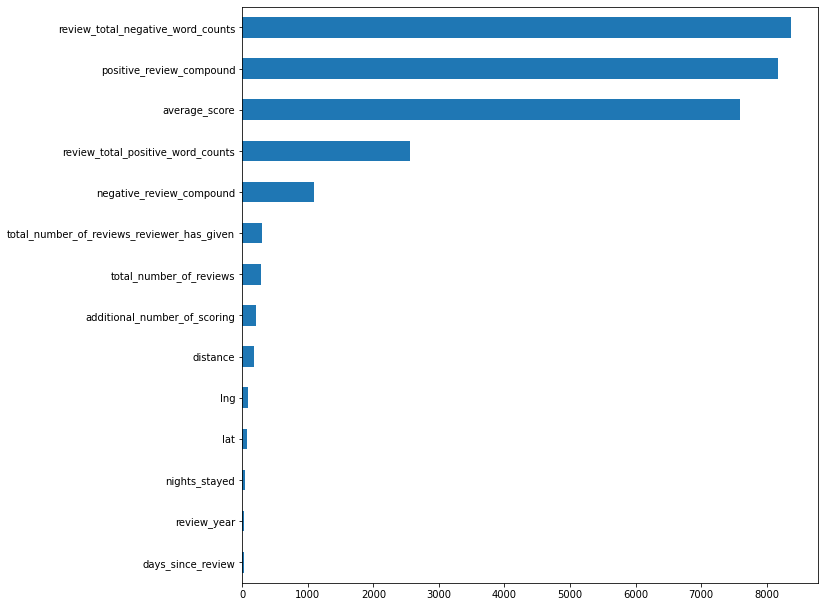

In [70]:
#график значимости непрерывных признаков
from sklearn.feature_selection import f_classif # anova
fig=plt.figure(figsize=(8,8))
axes=fig.add_axes([0,0,1,1])
imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

После нескольких итераций отбора признаков, создания и обучения модели были определены признаки, удаление которых приводит к улучшению модели. Это признаки тега Other (tag_3), года отзыва (review_year) и координат отеля (lat, lng)

In [71]:
#список признаков для удаления
less_important=['tag_3','review_year','lng','lat']

In [72]:
#удаляем признаки из тренировочных и тестовых данных, и данных Х
train_data=train_data.drop(less_important,axis=1)
test_data=test_data.drop(less_important,axis=1)
X=X.drop(less_important,axis=1)

### Создание и обучение модели

In [73]:
# Воспользуемся специальной функцией train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [74]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 39), (386803, 39), (386803, 38), (309442, 38), (77361, 38))

In [75]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [76]:
# Создаём модель
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [77]:
# Обучаем модель на тренировочном наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.7s finished


In [78]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.9840687555745143


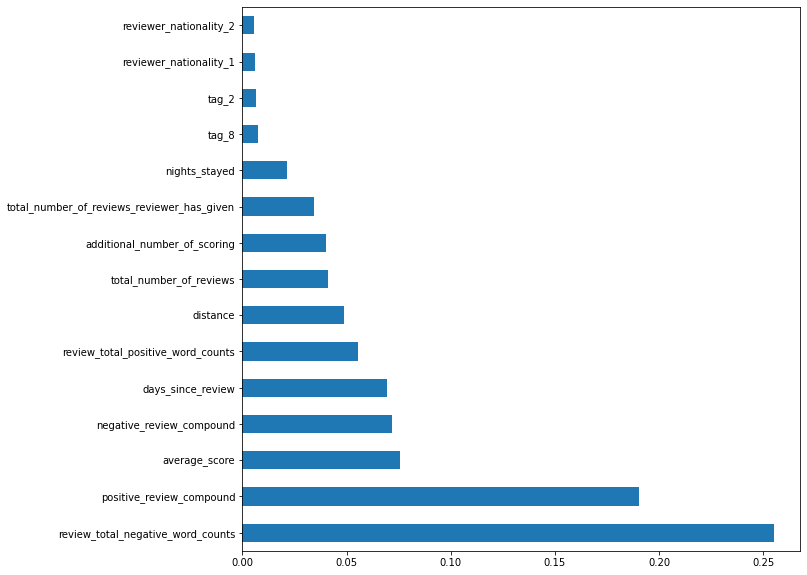

In [79]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

### Подготовка файла для сабмита в соревнование

In [80]:
test_data = test_data.drop(['reviewer_score'], axis=1)   #удаляем целевую переменную в тестовом датасете, которую мы ранее заполняли нулями

In [81]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.3s finished


In [82]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.22,488440
1,6.40,274649
2,8.38,374688
3,9.47,404352
4,9.36,451596
5,8.65,302161
6,7.26,317079
7,6.87,13963
8,7.86,159785
9,7.54,195089
